## Forest Area change

## importing libraries

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import norm
from ipywidgets import interact,IntSlider,FloatSlider

In [30]:
df = pd.read_excel(r'Forest Area.xlsx')
df.to_csv
df.head()

,country name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,4.2,4.20,4.20,4.20,4.20,4.20,4.20,4.20,4.20,...,4.20,4.2,4.200,4.20,4.200,4.20,4.200,4.2,4.200,4.2
1,Afghanistan,12084.4,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,...,12084.40,12084.4,12084.400,12084.40,12084.400,12084.40,12084.400,12084.4,12084.400,12084.4
2,Angola,792627.8,791073.63,789519.46,787965.29,786411.12,784856.95,783302.78,781748.61,780194.44,...,727130.61,721580.0,716029.380,710478.76,704928.140,699377.52,693826.900,688276.2,682725.700,677175.1
3,Albania,7888.0,7868.50,7849.00,7829.50,7810.00,7790.50,7771.00,7751.50,7732.00,...,7807.93,7820.7,7834.935,7849.17,7863.405,7877.64,7891.875,7891.8,7889.025,7889.0
4,Andorra,160.0,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,...,160.00,160.0,160.000,160.00,160.000,160.00,160.000,160.0,160.000,160.0


In [31]:
year=df.columns[1::28]
year

Index([1990, 2018], dtype='object')

## Calculating Random Variable

In [32]:
yr1990=df[year[0]]
yr2018=df[year[1]]
fraction_of_change=(yr2018-yr1990)/yr1990

#AREA_CHANGE IS TAKEN AS RANDOM VARIABLE

area_change=yr2018-yr1990
RV1=area_change.to_list()

### PLOT FOR FRACTION OF CHANGE IN FOREST COVER AREA

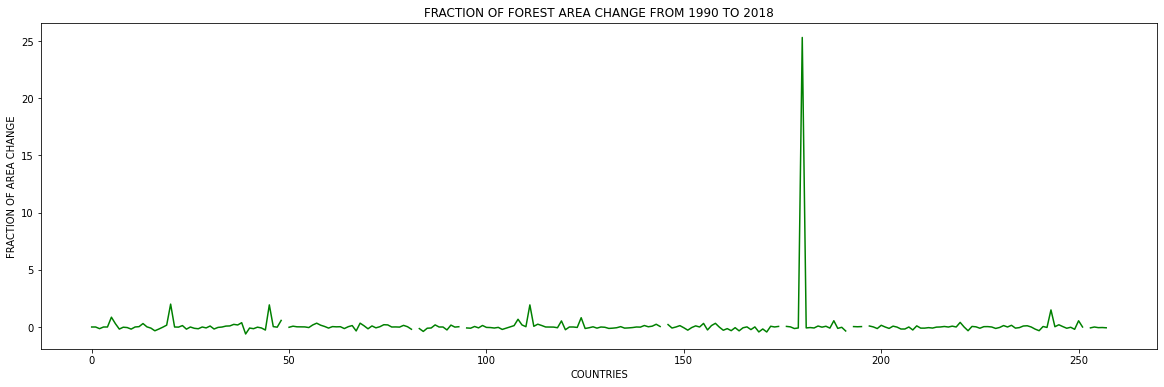

In [33]:
plt.figure(figsize=(20,6))
plt.plot(fraction_of_change,'g-');
ylabel('FRACTION OF AREA CHANGE')
xlabel('COUNTRIES')
title('FRACTION OF FOREST AREA CHANGE FROM 1990 TO 2018');

## PLOT FOR AREA OF CHANGE IN  FOREST AREA AGAINST COUNTRIES

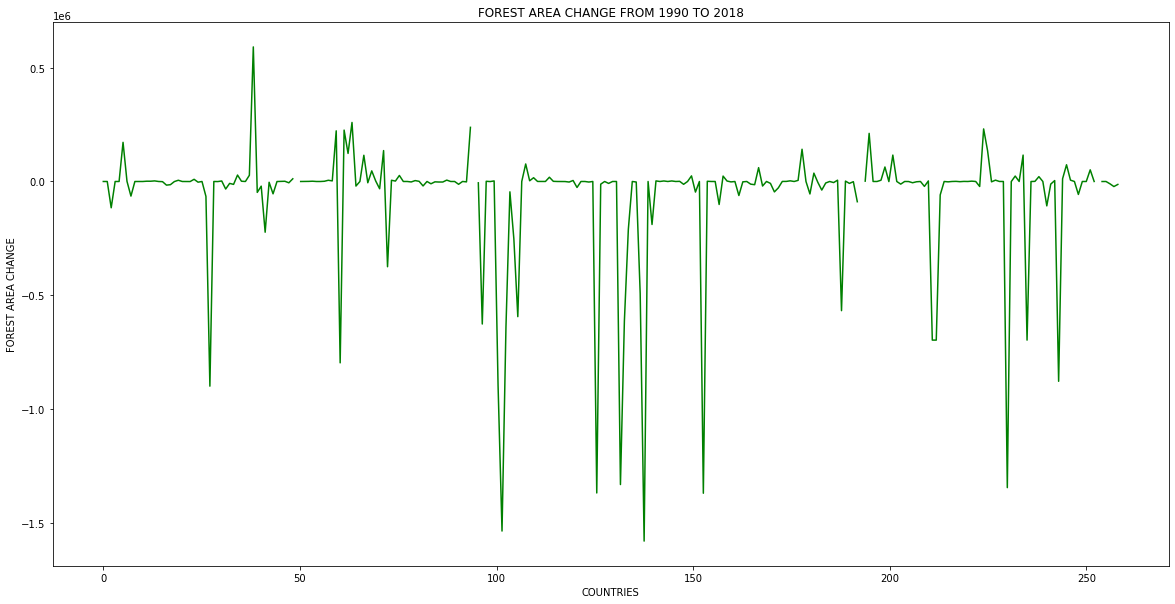

In [34]:
x=np.linspace(0,258,258)
plt.figure(figsize=(20,10))
plt.plot(x,RV1,'g-');
ylabel('FOREST AREA CHANGE')
xlabel('COUNTRIES')
title('FOREST AREA CHANGE FROM 1990 TO 2018');

## BAR GRAPH

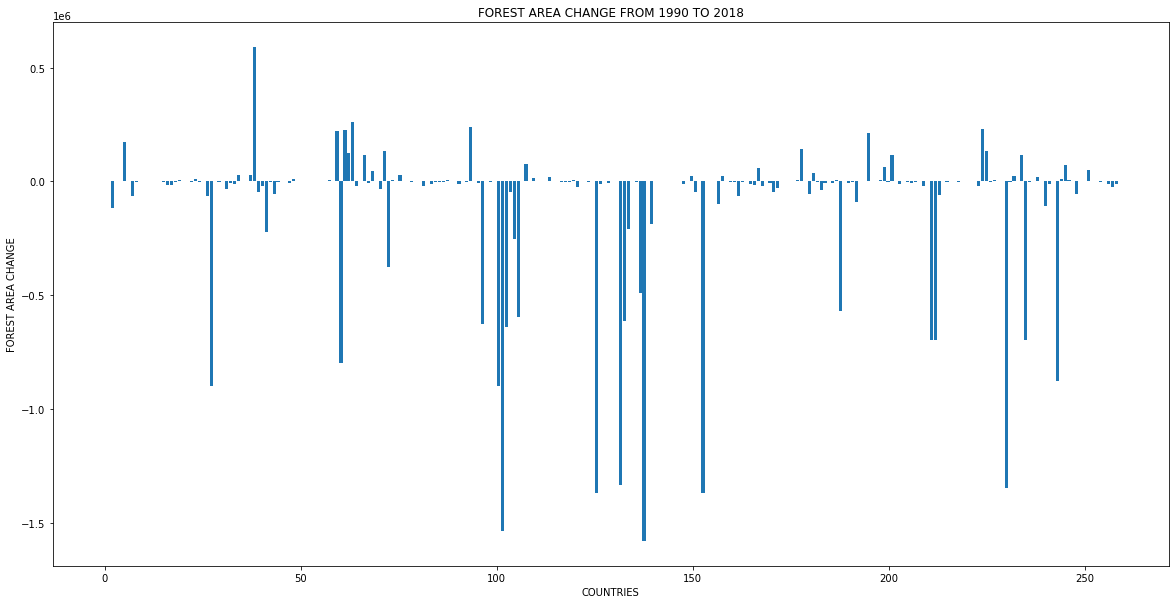

In [35]:

plt.figure(figsize=(20,10))
plt.bar(x,RV1)
ylabel('FOREST AREA CHANGE')
xlabel('COUNTRIES')
title('FOREST AREA CHANGE FROM 1990 TO 2018');

## HISTOGRAM

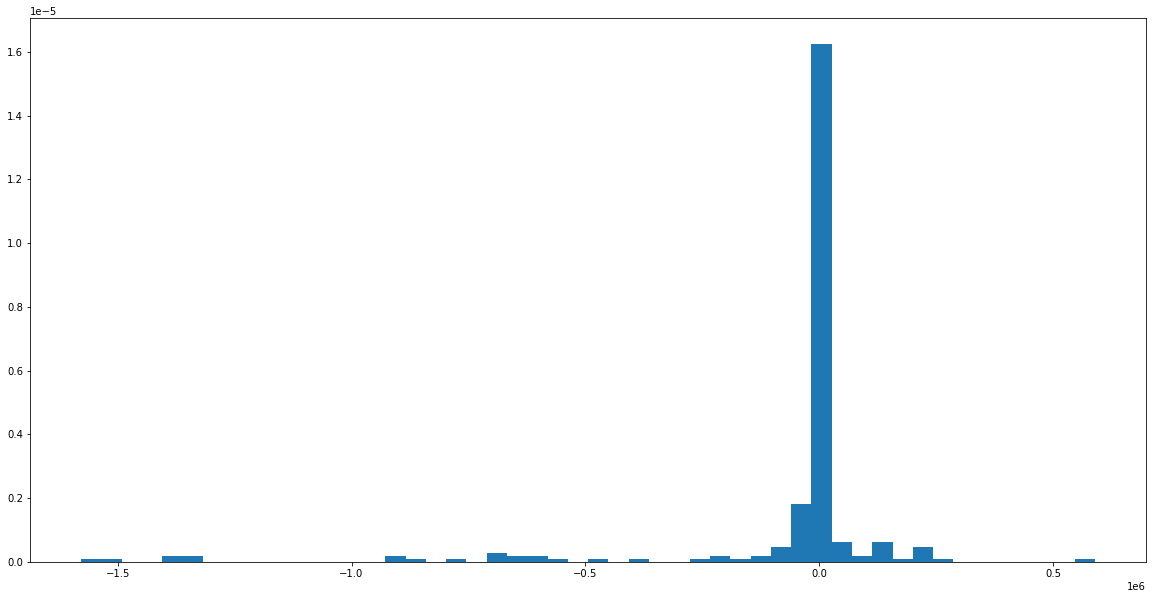

In [36]:
plt.figure(figsize=(20,10))
plt.hist(RV1,bins=50,density=True);

## TRUE PARAMETERS

In [37]:
mu=np.mean(area_change)  #TRUE MEAN
sigma=np.std(area_change)  #TRUE STANDARD DEVIATION

print('True Mean of Forest area change from 1990 to 2018 is ',mu,'\n\n')
print('Standard deviation of Forest area change from 1990 to 2018 is ',sigma)

True Mean of Forest area change from 1990 to 2018 is  -65526.33608267717 


Standard deviation of Forest area change from 1990 to 2018 is  272748.79237178335


## SAMPLING DISTRIBUTION OF MEAN

In [38]:
@interact
def sampling_mean(sample_size=IntSlider(start=1,step=5,value=100)):
    n=sample_size
    nexp=10000
    sample_mean=[]
    for i in np.arange(nexp):
        sample_mean.append(np.mean(area_change.sample(n,replace=True)))
    dfmean=pd.DataFrame({'sample mean':sample_mean})
    plt.figure(figsize=(20,10))
    plt.hist(sample_mean,bins=50,density=True);
    ymin,ymax=ylim()
    xlim(-300000,150000)
    title('HISTOGRAM OF SAMPLE MEAN')
    plt.vlines(mu,0.,ymax,color='r',lw=3,alpha=0.6)#VERTICAL LINE CORRESPONDING TO TRUE MEAN

interactive(children=(IntSlider(value=100, description='sample_size', step=5), Output()), _dom_classes=('widge…

## TRUE VARIANCE

In [39]:
true_variance=sigma**2
print('True Variance is',true_variance)

True Variance is 74391903740.26617


## SAMPLING DISTRIBUTION OF VARIANCE

In [40]:
@interact
def sampling_variance(sample_size=IntSlider(start=1,step=5,value=100)):
    n=sample_size
    nexp=10000
    sample_variance=[]
    for i in np.arange(nexp):
        sample=area_change.sample(n,replace=True)
        terms=[]
        for j in sample.index:
            terms.append(((area_change[j]-np.mean(sample))**2)/(n-1))
        S2=np.sum(terms)
        sample_variance.append(S2)
    dfvar=pd.DataFrame({'sample variance':sample_variance})
    plt.figure(figsize=(20,10))
    plt.hist(sample_variance,bins=50,density=True);
    ymin,ymax=ylim() 
    xlim(-2e11,2.75e11)
    title('HISTOGRAM OF SAMPLE VARIANCE')
    plt.vlines(sigma**2,0.,ymax,color='r',lw=3,alpha=0.5)#VERTICAL LINE CORRESPONDING TO TRUE VARIANCE

interactive(children=(IntSlider(value=100, description='sample_size', step=5), Output()), _dom_classes=('widge…

# INTERVAL ESTIMATION

### 1) MEAN

In [41]:
@interact
def interval_mean(n=50,confidence=FloatSlider(start=1,stop=100,step=5,value=95)):
    sample_mean=[]
    for i in np.arange(10000):
        sample_mean.append(np.mean(area_change.sample(n,replace=True)))
    cmin,cmax=np.percentile(sample_mean,[(100-confidence)/2,100-((100-confidence)/2)])
    plt.figure(figsize=(20,10))
    plt.hist(sample_mean,bins=50,density=True);
    ymin,ymax=ylim()
    plt.vlines(cmin,0.,ymax,color='r',lw=1,alpha=1)
    plt.vlines(cmax,0.,ymax,color='r',lw=1,alpha=1)
    print('Confidence interval is [',cmin,',',cmax,']')

interactive(children=(IntSlider(value=50, description='n', max=150, min=-50), FloatSlider(value=95.0, descript…

### 2) VARIANCE

In [42]:
@interact
def interval_variance(n=50,confidence=FloatSlider(start=1,stop=100,step=5,value=95)):
    sample_variance=[]
    for i in np.arange(10000):
        sample=area_change.sample(n,replace=True)
        terms=[]
        for j in sample.index:
            terms.append(((area_change[j]-np.mean(sample))**2)/(n-1))
        S2=np.sum(terms)
        sample_variance.append(S2)
    cmin,cmax=np.nanpercentile(sample_variance,[(100-confidence)/2,100-((100-confidence)/2)])
    plt.figure(figsize=(20,10))
    plt.hist(sample_variance,bins=50,density=True);
    ymin,ymax=ylim()
    plt.vlines(cmin,0.,ymax,color='r',lw=1,alpha=1)
    plt.vlines(cmax,0.,ymax,color='r',lw=1,alpha=1)
    print('Confidence interval is [',cmin,',',cmax,']')

interactive(children=(IntSlider(value=50, description='n', max=150, min=-50), FloatSlider(value=95.0, descript…

------------------------------------------------------------------------------------------------------------

## Random Variable:- Absolute change of CO2 emissions around the world

1) As all greenhouse gases are hard to analyse, We are considering the Absolute change in single greenhouse gas
i.e CO2.
3) As the data for CO2 emission is in order of million and billion tonnes I have divided the absolute change by    100000000 to scale it down,to visualize better.
3) As CO2 occupies 80percent of all the greenhouse gases we are considering it .

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Absolute_change.csv')
df.head()

,Country,C02 emissions in 1999,CO2 emissions in2018,AbsoluteChange(1999-2018)
0,Afghanistan,"8,09,512",10450000,0.096405
1,Albania,"8,09,512",5400000,0.045905
2,Andorra,"5,12,960","4,64,210",-0.000487
3,Angola,9130000,37680000,0.285500
4,Anguilla,"80,608","1,47,145",0.000665


In [3]:
df.tail()

,Country,C02 emissions in 1999,CO2 emissions in2018,AbsoluteChange(1999-2018)
212,Venezuela,172560000,129600000,-0.4296
213,Vietnam,46660000,211770000,1.6511
214,Yemen,13720000,9950000,-0.0377
215,Zambia,1780000,6930000,0.0515
216,Zimbabwe,15730000,11340000,-0.0439


- AS we are only analysing Absolute change only columns of Absolute change are of importance to us.

In [4]:
AC=df['AbsoluteChange(1999-2018)'] #AC choosen for absolute change
AC.head()

0    0.096405
1    0.045905
2   -0.000487
3    0.285500
4    0.000665
Name: AbsoluteChange(1999-2018), dtype: float64

- AC is the random variable of Absolute change between the year 1999-2018

In [5]:
x=np.linspace(0,217,217)

- Let's analyse AC and see its true distribution

In [6]:
print('True mean of AC is',end=' ')
print(np.nanmean(AC))
mu=np.nanmean(AC)

True mean of AC is 0.48220284032258054


## Average change in CO2 emission from 1999-2018 is 48220284 tonnes.

In [7]:
print('True standard deviation of AC is',end=' ')
print(np.nanstd(AC))

True standard deviation of AC is 4.786040442072372


In [8]:
print('True variance of AC is',end=' ')
print(np.nanvar(AC))

True variance of AC is 22.906183113152306


Text(0.5, 1.0, 'True plot for the Scaled Absolute change in CO2 emissions')

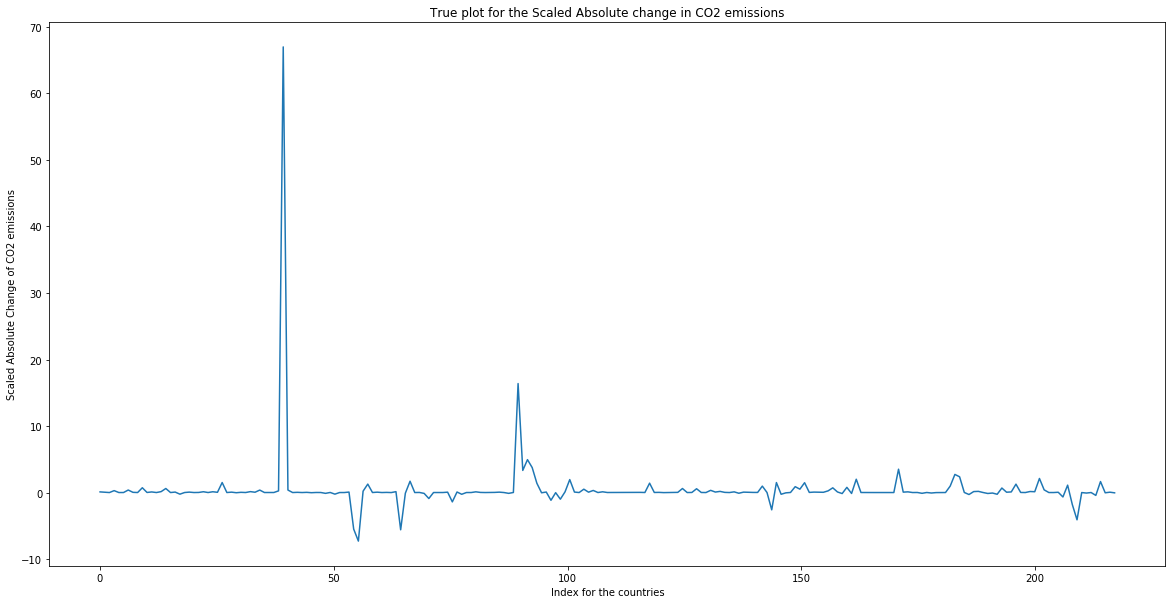

In [9]:
#plot of AC
plt.figure(figsize=(20,10))
plt.plot(x,AC) #This is the true distribution of the scaled absolute change
plt.xlabel('Index for the countries')
plt.ylabel('Scaled Absolute Change of CO2 emissions')
plt.title('True plot for the Scaled Absolute change in CO2 emissions')

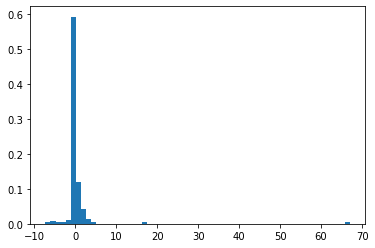

In [10]:
#For plotting marginal distribution we have to plot the histogram for AC
plot=plt.hist(AC,bins=60,density=True);

67.0
-7.3


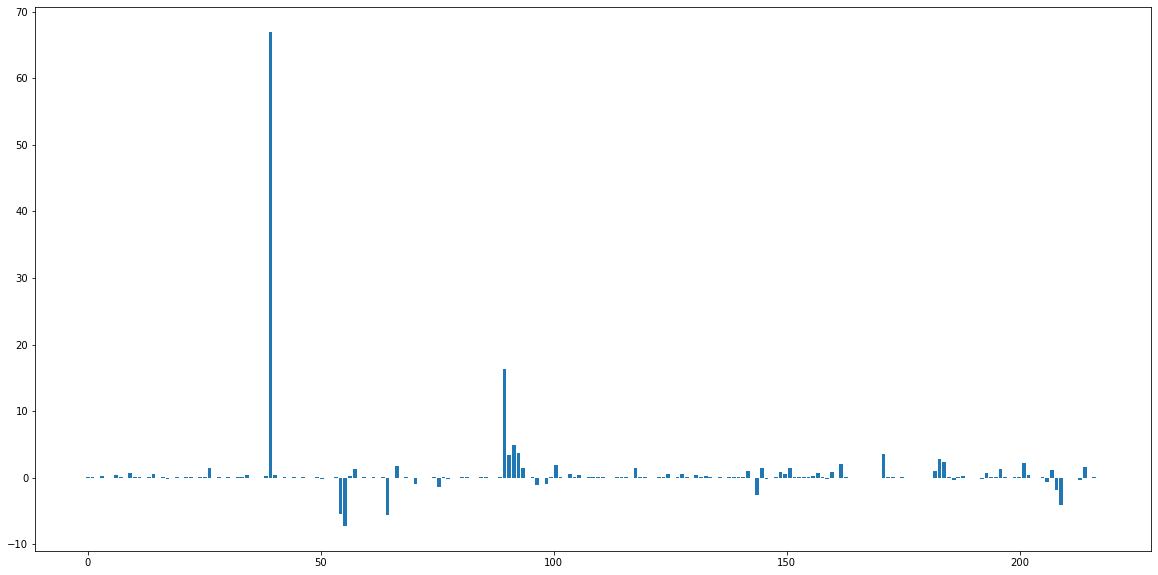

In [11]:
#Bar plot  of Scaled Absolute change for better visualization of negative values
plt.figure(figsize=(20,10))
barplot=plt.bar(x,AC)
ymax=max(AC)
print(ymax)
ymin=min(AC)
print(ymin)

In [12]:
'''For finding the countries with max and min change of Carbon emissions we need to find it's Index'''
for i in range(217):
    if AC[i]==67:
        print(i)
    else:
        pass
for i in range(217):
    if AC[i]==-7.3:
        print(i)
    else:
        pass

39
55


In [13]:
df.iloc[39]

Country                           China
C02 emissions in 1999        3260000000
CO2 emissions in2018         9960000000
AbsoluteChange(1999-2018)          67.0
Name: 39, dtype: object

In [14]:
df.iloc[55]

Country                           EU-28
C02 emissions in 1999        4160000000
CO2 emissions in2018         3430000000
AbsoluteChange(1999-2018)          -7.3
Name: 55, dtype: object

- China has the Maximum positive change for the CO2 emission.

- While in European union CO2 emission has decreased the most.

In [15]:
#Now let's see the contries which has significant amount of emissions.
condition=(df['AbsoluteChange(1999-2018)']>1.0)

In [16]:
df[condition]

,Country,C02 emissions in 1999,CO2 emissions in2018,AbsoluteChange(1999-2018)
26,Brazil,316280000,466650000,1.5037
39,China,3260000000,9960000000,67.0000
57,Egypt,124500000,251460000,1.2696
66,Europe (excl. EU-28),2010000000,2180000000,1.7000
89,India,951670000,2590000000,16.3833
90,Indonesia,243950000,576580000,3.3263
91,International transport,765730000,1260000000,4.9427
92,Iran,379630000,755400000,3.7577
93,Iraq,71680000,211270000,1.3959
100,Kazakhstan,124950000,319650000,1.9470


- For above all the countries,continents and international transport the change of CO2 emission is over 100 million tonnes.

- Now Let's move on to sampling distribution through probabilistic programming

## Sampling distribution for mean

In [17]:
from ipywidgets import interact,IntSlider,FloatSlider

In [18]:
'''I am defining a function which takes argument as sample size and prints the mean of sampling distribution and
plots histogram.'''
def sample(n): 
    means=[]
    for i in range(1000):
        means.append(np.mean(np.random.choice(AC,size=n,replace=True)))
    print('Sampling mean=',end=' ')
    print(np.nanmean(means))
    plt.hist(means,bins=60,density=True);
    ymin,ymax=plt.ylim()
    plt.title('Histogram of Sample mean')
    plt.vlines(mu,0.,ymax,color='r',lw=1,alpha=0.5)#VERTICAL LINE CORRESPONDING TO TRUE MEAN

In [19]:
interact(sample,n=(5,100))

interactive(children=(IntSlider(value=52, description='n', min=5), Output()), _dom_classes=('widget-interact',…

<function __main__.sample(n)>

- We can see that sample mean is so close to the true mean

In [20]:
#For confidence interval of 95% using percentile formula

In [21]:
def confidence_interval(n,percent):
    means=[]
    for i in range(1000):
        means.append(np.mean(np.random.choice(AC,size=n,replace=True)))
    print(np.nanpercentile(means,[(100-percent)/2,100-(100-percent)/2]))

In [22]:
interact(confidence_interval,n=(5,100),percent=(1,99))

interactive(children=(IntSlider(value=52, description='n', min=5), IntSlider(value=50, description='percent', …

<function __main__.confidence_interval(n, percent)>

- Now Let's move on to the next statistic variance

In [23]:
def sam(n):
    variances=[]
    nexp=10000 #This is number of expirements
    for i in range(nexp):
        z=np.random.choice(AC,size=n,replace=True)
        zbar=np.nanmean(z) #Sample mean for z
        sum=0
        for i in range(n):
            sum+=(z[i]-zbar)**2/(n-1)
        variances.append(sum)
    print('Mean of all the sample variances=',end=' ')
    print(np.nanmean(variances))
    plt.hist(variances,bins=10,density=True)   

In [24]:
interact(sam,n=(5,100))

interactive(children=(IntSlider(value=52, description='n', min=5), Output()), _dom_classes=('widget-interact',…

<function __main__.sam(n)>

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

- We can see that the variance here is very close to the true variance we calculated.

## Joint Distributions

In [25]:
df1=pd.read_csv('refined_data.csv')
df1.head()

,Country,CC,TC,FC
0,Albania,0.045905,0.974247,0.00
1,Angola,0.285500,0.025205,0.00
2,Antigua and Barbuda,0.002234,0.071507,-101465.17
3,Armenia,0.032500,1.003836,176.50
4,Austria,0.011600,1.360548,143.13


In [26]:
CC=df1['CC'] #Data for CO2 emmisions change
TC=df1['TC'] #Data for Temperature change
FC=df1['FC'] #Data for Forest change

In [27]:
m=np.linspace(0,177,177)

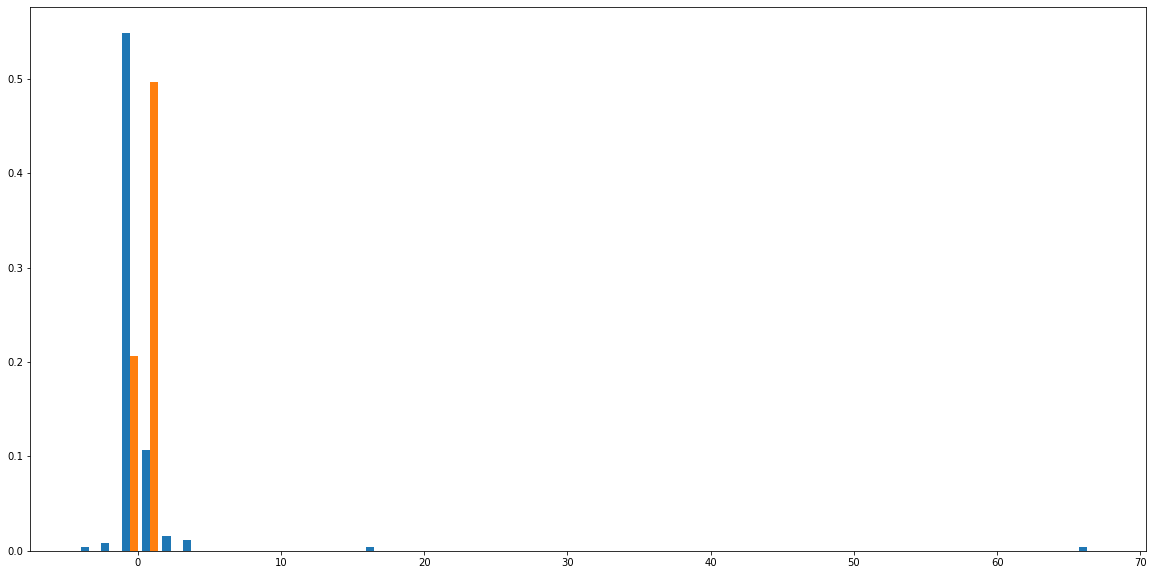

In [28]:
# Joint distribution for CO2 emission and temperature change
plt.figure(figsize=(20,10))
plt.hist((CC,TC),bins=50,density=True);

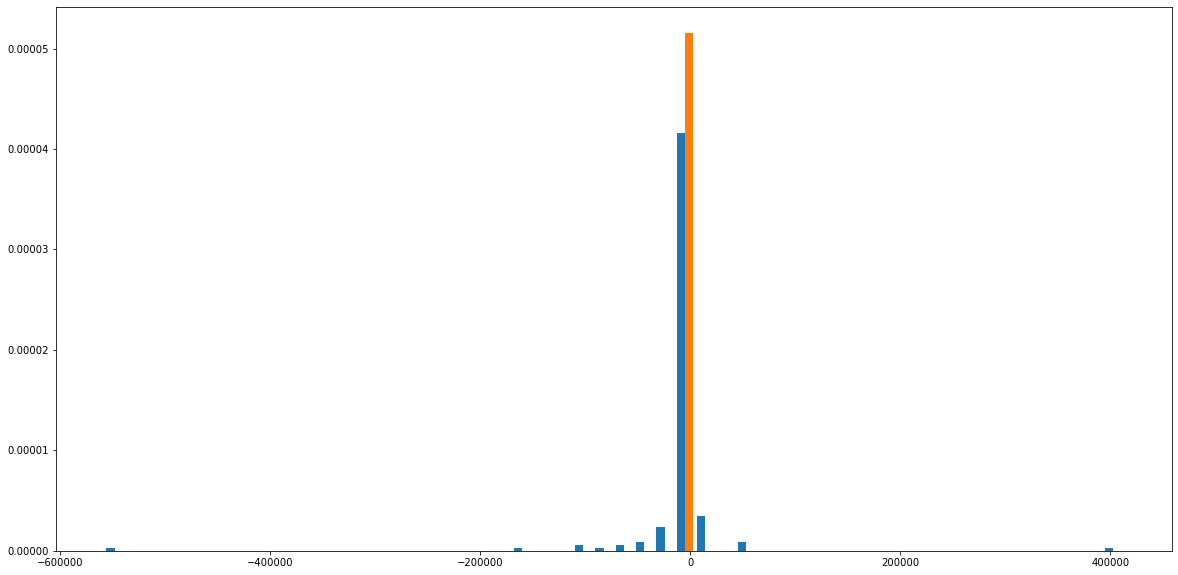

In [29]:
# Joint distribution for Forest change and temperature change
plt.figure(figsize=(20,10))
plt.hist((FC,TC),bins=50,density=True);

## Analysis on Temperature change

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import norm
from ipywidgets import interact,IntSlider,FloatSlider

In [2]:
df3=pd.read_csv('data_temp.csv')
df3.head()

,Year,Value
0,1960,0.05
1,1961,0.10
2,1962,0.11
3,1963,0.12
4,1964,-0.14


In [27]:
year=df3.columns[0]
rv=df3[year[::]]
rv1=rv.to_list()
temp=df3.columns[1]
rv2=df3[temp[::]]
rv3=rv2.to_list()

0.35966666666666663

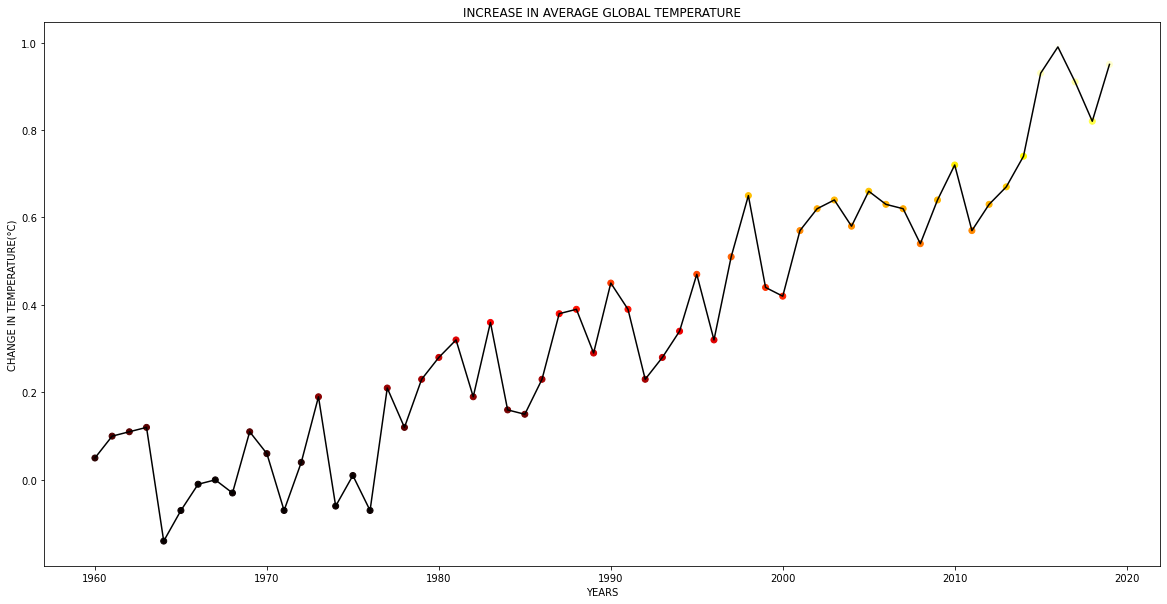

In [4]:
plt.figure(figsize=(20,10))
plt.scatter(rv1,rv3,color=cm.hot(rv3));
plt.plot(rv1,rv3,'black')
xlabel('YEARS')
ylabel('CHANGE IN TEMPERATURE(°C)')
title('INCREASE IN AVERAGE GLOBAL TEMPERATURE');

In [37]:
average_increase=(rv3[-1]-rv3[0])/(rv1[-1]-rv1[0])
print('AVERAGE ANNUAL INCREASE IN TEMPERATURE(1960-2020) IS',average_increase,'°C')

AVERAGE ANNUAL INCREASE IN TEMPERATURE(1960-2020) IS 0.015254237288135592 °C


In [36]:
df = pd.read_excel('Temp_change_2.xlsx')
df.to_csv
df.head()

,Countries,Average 2018,Average 1999
0,Albania,13.077534,12.103288
1,Angola,21.716712,21.691507
2,Antigua and Barbuda,26.467123,26.395616
3,Armenia,8.738630,7.734795
4,Austria,8.406849,7.046301


In [15]:
df.max()

Countries       Marshall Islands
Average 2018             29.3551
Average 1999             28.7989
dtype: object

In [16]:
year=df.columns[1::]
inital=df[year[1]]
final=df[year[0]]
RV=final-inital
RV1=RV.to_list()

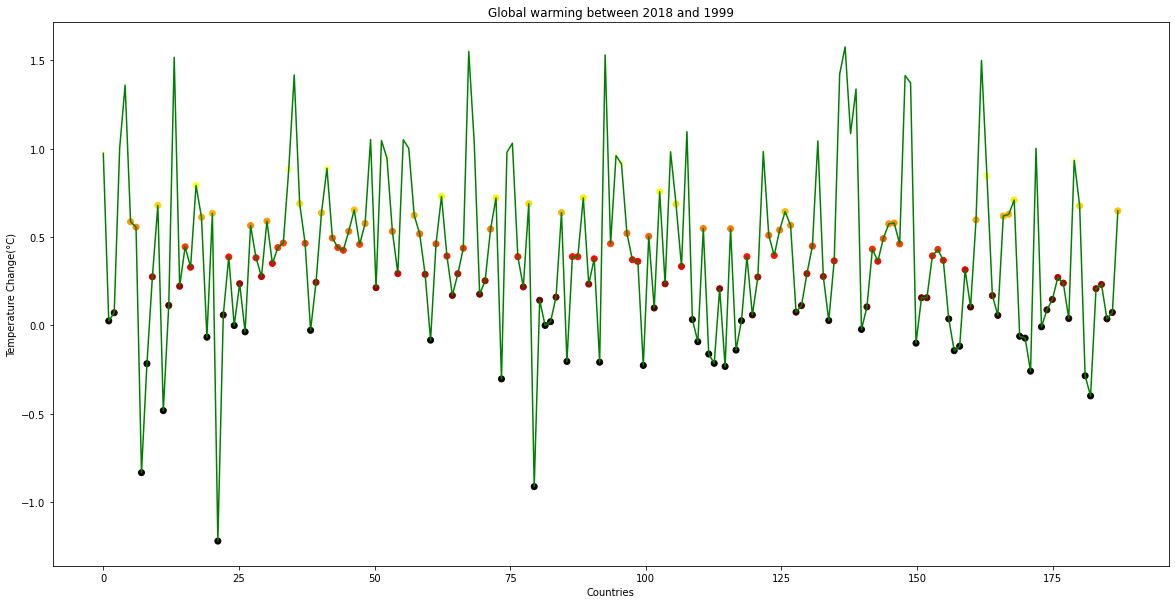

In [34]:
plt.figure(figsize=(20,10))
x=linspace(0,187,187)
plt.plot(x,RV1,'g-');
plt.scatter(x,RV1,color=cm.hot(RV1))
ylabel('Temperature Change(°C)')
xlabel('Countries')
title('Global warming between 2018 and 1999');

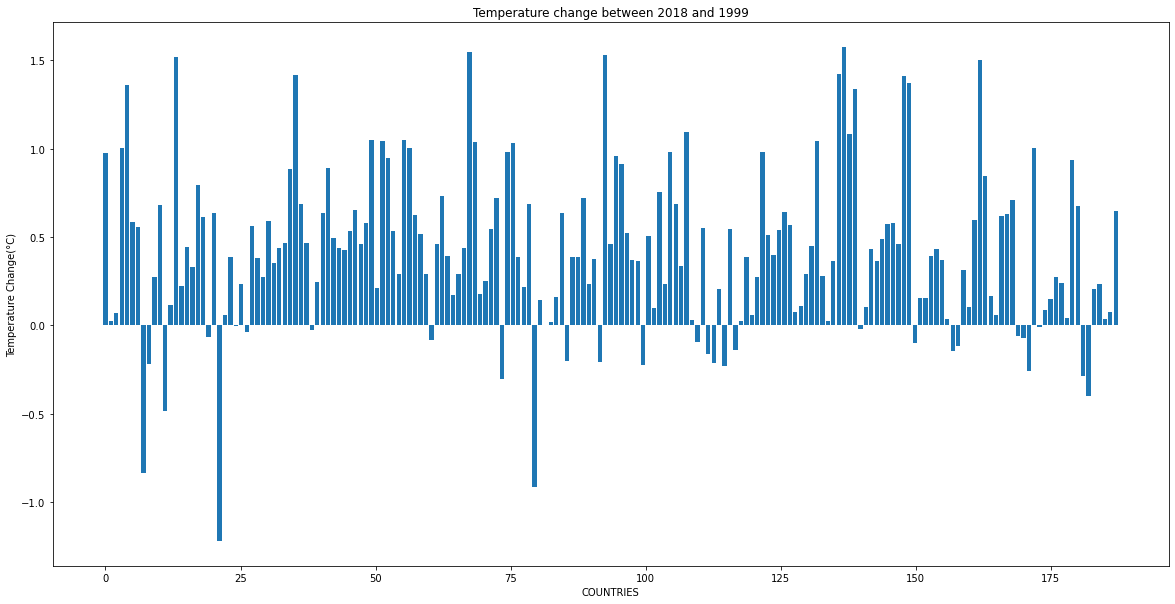

In [19]:
plt.figure(figsize=(20,10))
plt.bar(x,RV1)
ylabel('Temperature Change(°C)')
xlabel('COUNTRIES')
title('Temperature change between 2018 and 1999');

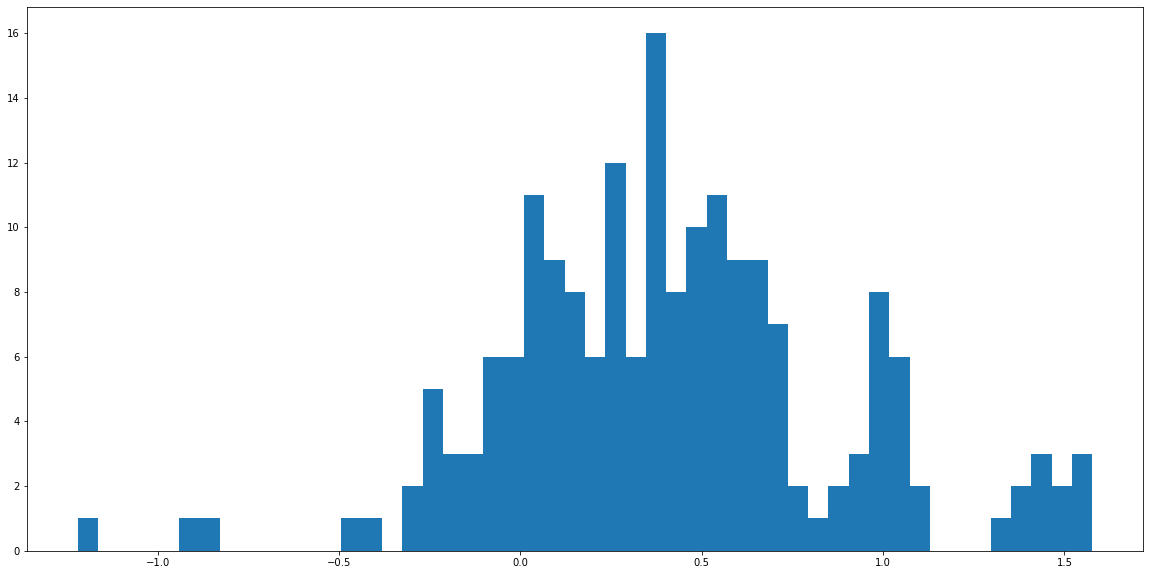

In [20]:
plt.figure(figsize=(20,10))
plt.hist(RV1,bins=50);

In [25]:
mu=np.mean(RV)
sigma=np.std(RV)
print('True Mean of Temperature change between 2018 and 1999 is ',mu,'°C')
print('Standard deviation of Temperature change between 2018 and 1999 is ',sigma,'°C')
print('Average Annual Temperature Change between 2018 and 1999 is',mu/20,'°C')

True Mean of Temperature change between 2018 and 1999 is  0.4141747862192512 °C
Standard deviation of Temperature change between 2018 and 1999 is  0.4623328857851503 °C
Average Annual Temperature Change between 2018 and 1999 is 0.020708739310962558 °C


In [29]:
nexp=1000
@interact
def sampling_mean(sample_size=IntSlider(start=1,step=5,value=50)):
    n=sample_size
    sample_mean=[]
    for i in np.arange(nexp):
        sample_mean.append(np.mean(RV.sample(n,replace=True)))
    dfmean=pd.DataFrame({'sample mean':sample_mean})
    plt.figure(figsize=(20,10))
    plt.hist(sample_mean,bins=50,density=True);
    ymin,ymax=ylim()
    title('HISTOGRAM OF SAMPLE MEAN')
    plt.vlines(mu,0.,ymax,color='r',lw=3,alpha=0.6)#VERTICAL LINE CORRESPONDING TO TRUE MEAN

interactive(children=(IntSlider(value=50, description='sample_size', step=5), Output()), _dom_classes=('widget…

In [30]:
true_variance=sigma**2
print('True Variance is',true_variance)

True Variance is 0.21375169727842483


In [31]:
@interact
def sampling_variance(sample_size=IntSlider(start=1,step=5,value=100)):
    n=sample_size
    sample_variance=[]
    for i in np.arange(nexp):
        sample=RV.sample(n,replace=True)
        terms=[]
        for j in sample.index:
            terms.append(((RV[j]-np.mean(sample))**2)/(n-1))
        S2=np.sum(terms)
        sample_variance.append(S2)
    dfvar=pd.DataFrame({'sample variance':sample_variance})
    plt.figure(figsize=(20,10))
    plt.hist(sample_variance,bins=50,density=True);
    ymin,ymax=ylim() 
    title('HISTOGRAM OF SAMPLE VARIANCE')
    plt.vlines(sigma**2,0.,ymax,color='r',lw=3,alpha=0.5)#VERTICAL LINE CORRESPONDING TO TRUE VARIANCE

interactive(children=(IntSlider(value=100, description='sample_size', step=5), Output()), _dom_classes=('widge…

In [32]:
@interact
def interval_mean(n=50,confidence=FloatSlider(start=1,stop=100,step=5,value=95)):
    sample_mean=[]
    for i in np.arange(nexp):
        sample_mean.append(np.mean(RV.sample(n,replace=True)))
    cmin,cmax=np.percentile(sample_mean,[(100-confidence)/2,100-((100-confidence)/2)])
    plt.figure(figsize=(20,10))
    plt.hist(sample_mean,bins=50,density=True);
    ymin,ymax=ylim()
    plt.vlines(cmin,0.,ymax,color='r',lw=1,alpha=1)
    plt.vlines(cmax,0.,ymax,color='r',lw=1,alpha=1)
    print('Confidence interval is [',cmin,',',cmax,']')

interactive(children=(IntSlider(value=50, description='n', max=150, min=-50), FloatSlider(value=95.0, descript…

In [33]:
@interact
def interval_variance(n=50,confidence=FloatSlider(start=1,stop=100,step=5,value=95)):
    sample_variance=[]
    for i in np.arange(nexp):
        sample=RV.sample(n,replace=True)
        terms=[]
        for j in sample.index:
            terms.append(((RV[j]-np.mean(sample))**2)/(n-1))
        S2=np.sum(terms)
        sample_variance.append(S2)
    cmin,cmax=np.nanpercentile(sample_variance,[(100-confidence)/2,100-((100-confidence)/2)])
    plt.figure(figsize=(20,10))
    plt.hist(sample_variance,bins=50,density=True);
    ymin,ymax=ylim()
    plt.vlines(cmin,0.,ymax,color='r',lw=1,alpha=1)
    plt.vlines(cmax,0.,ymax,color='r',lw=1,alpha=1)
    print('Confidence interval is [',cmin,',',cmax,']')

interactive(children=(IntSlider(value=50, description='n', max=150, min=-50), FloatSlider(value=95.0, descript…

## Hypothesis Testing

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm,t

In [2]:
df = pd.read_excel(r'Annual temperature Averages.xlsx')
df.to_csv;


## Null Hypothesis 
<br>

- **$H_{0}$ :** *There is a decrease in the average annual temperature of a region.* 
<br>

   * $\bar x_{d}$ is the mean of difference in sample of average annual temperature of a region in 2018 and 1999, i.e.,
     * **$\bar x_{d}$ < 0**

<br>

## Alternate Hypothesis
<br>

- **$H_{1}$ :** *There is an increase in the average annual temperature of a region.* 
<br>

   * $\bar x_{d}$ is the mean of difference in sample of average annual temperature of a region in 2018 and 1999, i.e.,
       * **$\bar x_{d}$ > 0** 


* We will be using **Paired t test** to test our hypothesis


In [3]:
diff = df['Average 2018'] - df['Average 1999']

## Test statistic (T)

<br>

* **T = $\frac{\bar x_{d} \sqrt N}{s_d}$**

In [4]:
# lets take the sample(N) of 100 countries
N = 100
sample_data = diff.sample(N)

# Standred deviation for sample dataset
s_d = np.std(sample_data, ddof=1)

# Mean of sample data
xbar_d = np.mean(sample_data)


In [5]:
T = (xbar_d)*np.sqrt(N)/s_d
print(f'Test statistic is equals to {T}')

Test statistic is equals to 7.139877405031942


* **Level of Significance, $\alpha$ is 0.05.**

<br>

* This will be the t-distribution with degree of freedom **N-1.**

In [6]:
# p-value for T 
p = 1-t(N-1).cdf(T)
print(f'The p-value for our statistic is {p}')

The p-value for our statistic is 7.923706135670727e-11


### Decision:
* The p-value calculated above is less than the level of significance, hence $H_{0}$ is rejected. 
* This means **$\bar x_{d}$ > 0** and there is a increase in average annual temperature.

<br>

### Conclusion:
* At a 5% level of significance, from the sample data, there is sufficient evidence to conclude that there is an increase in the average annual temperature of a region.


## Relation analysis

In [130]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
from sklearn import linear_model
import pandas as pd
import statsmodels.api as sm
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc
%matplotlib inline

## **Reading data**

In [131]:
df = pd.read_csv('ae.csv')
df.head()
#cc = Carbon dioxide emission change
#fc = forest cover change
#tc = temperature change

,Country,cc,tc,fc
0,Albania,4.590488,0.974247,0.00000
1,Angola,28.550000,0.025205,0.00000
2,Armenia,3.250000,1.003836,0.17650
3,Austria,1.160000,1.360548,0.14313
4,Bahamas,0.080000,0.587123,-47.69600


In [132]:
df.corr()

,cc,tc,fc
cc,1.000000,-0.139357,0.013241
tc,-0.139357,1.000000,-0.085059
fc,0.013241,-0.085059,1.000000


## **Correlation between co2 change and temperature change**

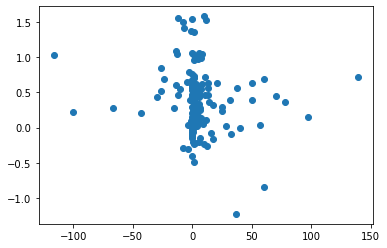

In [133]:
plt.scatter(df['cc'], df['tc'])
plt.show()

In [134]:
np.corrcoef(df['cc'], df['tc'])

array([[ 1.        , -0.13935742],
       [-0.13935742,  1.        ]])

## **Correlation between forest cover change and temperature change**

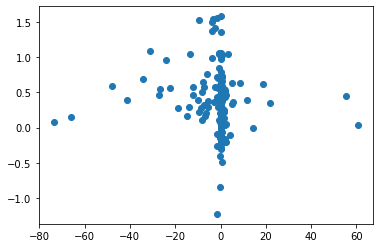

In [135]:
plt.scatter(df['fc'], df['tc'])
plt.show()

In [136]:
np.corrcoef(df['fc'], df['tc'])

array([[ 1.        , -0.08505912],
       [-0.08505912,  1.        ]])

## **Regression curve of temperature change and carbon emission change**

In [137]:


#define response variable
y = df['tc']

#define explanatory variable
x = df['cc']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     tc   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.931
Date:                Thu, 01 Jul 2021   Prob (F-statistic):             0.0890
Time:                        00:45:17   Log-Likelihood:                -92.165
No. Observations:                 150   AIC:                             188.3
Df Residuals:                     148   BIC:                             194.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4013      0.037     10.707      0.0

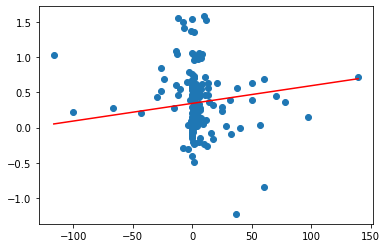

In [138]:
Y_pred = -0.0025*x + 0.4013

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

The **point estimate** of the above regression is the mean of Y_pred i.e. **0.388769**

In [139]:
print(np.mean(Y_pred))

0.3886829386499999


Optimal Values
a: -0.0024582073761021395
b: 0.40126458498770234
R^2: 0.019420490850346805
Uncertainty
a: -0.0025+/-0.0014
b: 0.40+/-0.04


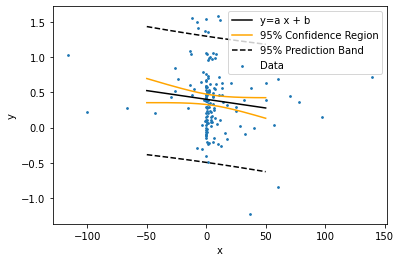

<Figure size 3000x3000 with 0 Axes>

In [140]:
n = len(y)

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
a = popt[0]
b = popt[1]
print('Optimal Values')
print('a: ' + str(a))
print('b: ' + str(b))

# compute r^2
r2 = 1.0-(sum((y-f(x,a,b))**2)/((n-1.0)*np.var(y,ddof=1)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

# plot data
plt.scatter(x, y, s=3, label='Data')

# calculate regression confidence interval
px = np.linspace(-50, 50, 1000)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x, y, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='orange')
# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
figure(figsize=(20, 20), dpi=150) 
plt.show()

The above graph is the interval estimates of the linear regression.

## **Regression curve of temperature change and forest cover change**

In [141]:

#define response variable
y = df['tc']

#define explanatory variable
x = df['fc']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

 

                            OLS Regression Results                            
Dep. Variable:                     tc   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.079
Date:                Thu, 01 Jul 2021   Prob (F-statistic):              0.301
Time:                        00:45:18   Log-Likelihood:                -93.091
No. Observations:                 150   AIC:                             190.2
Df Residuals:                     148   BIC:                             196.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3818      0.038     10.153      0.0

The point estimate of the above regression is

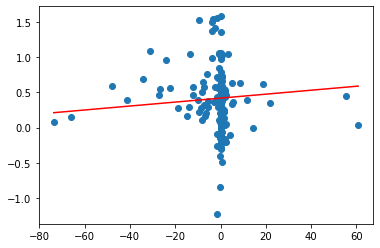

In [142]:
Y_pred = -0.0028*x + 0.3818

plt.scatter(x,y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

The **point estimate** of the above regression is the mean of Y_pred i.e. **0.388769**

In [143]:
print(np.mean(Y_pred))

0.3887689734239998


Optimal Values
a: -0.002822522767774195
b: 0.38183341693769884
R^2: 0.007235053579447315
Uncertainty
a: -0.0028+/-0.0027
b: 0.38+/-0.04


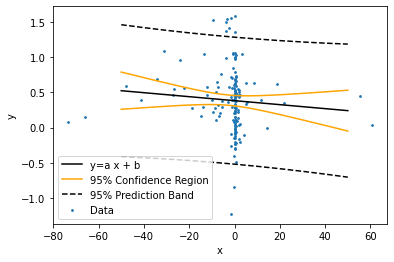

<Figure size 3000x3000 with 0 Axes>

In [144]:
n = len(y)

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
a = popt[0]
b = popt[1]
print('Optimal Values')
print('a: ' + str(a))
print('b: ' + str(b))

# compute r^2
r2 = 1.0-(sum((y-f(x,a,b))**2)/((n-1.0)*np.var(y,ddof=1)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

# plot data
plt.scatter(x, y, s=3, label='Data')

# calculate regression confidence interval
px = np.linspace(-50, 50, 1000)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x, y, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='orange')
# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
figure(figsize=(20, 20), dpi=150) 
plt.show()

The above graph is the interval estimates of the linear regression.

## **The multi variable regression**

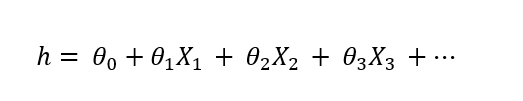

here h is the value which needs to be predicted (Temperature change in this case) and X1 and X2 are the features of the model , in this case , Co2 emission change and forest cover change respectively.

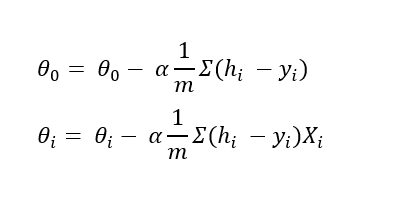

In [145]:
#define response variable
y = df['tc']

#define explanatory variable
x = df[['cc','fc']]

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     tc   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.989
Date:                Thu, 01 Jul 2021   Prob (F-statistic):              0.141
Time:                        00:45:18   Log-Likelihood:                -91.633
No. Observations:                 150   AIC:                             189.3
Df Residuals:                     147   BIC:                             198.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3943      0.038     10.353      0.0

Therefore the hypothesis function is given as follows:

**Temperature change = 0.3943 - 0.0024x(Co2 emission change) - 0.0028x(forest cover change)** 

R-squared: 0.026. This is known as the coefficient of determination. It is the proportion of the variance in the response variable that can be explained by the predictor variables. In this example, 2.6% of the variation in the temperature can be explained by the CO2 emission and the forest cover
Prob (F-statistic): 0.141. This is the p-value associated with the overall F-statistic.  It tells us whether or not the regression model as a whole is statistically significant. In other words, it tells us if the two predictor variables combined have a statistically significant association with the response variable. In this case the p-value is not less than 0.05, which indicates that the predictor variables “cc” and “fc” combined doesn't have a statistically significant association with temperature change as far as our data goes.

## End

----------------------------------------------------------------------------------------------------------------